In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#Import data
train_main = pd.read_csv('train.csv',parse_dates=[2,3],dtype={'id':np.object,'vender_id':np.uint8,'passenger_count':np.uint8,
                                                        'pickup_longitude':np.float32,'pickup_latitude':np.float32,
                                                        'dropoff_longitude':np.float32,'dropoff_latitude':np.float32,
                                                        'store_and_fwd_flag':'category','trip_duration':np.int32})
test_main = pd.read_csv('test.csv',parse_dates=[2],dtype={'id':np.object,'vender_id':np.uint8,'passenger_count':np.uint8,
                                                        'pickup_longitude':np.float32,'pickup_latitude':np.float32,
                                                        'dropoff_longitude':np.float32,'dropoff_latitude':np.float32,
                                                        'store_and_fwd_flag':'category'})
print('Number of rows & columns in Train & test', train_main.shape,test_main.shape)

Number of rows & columns in Train & test (1458644, 11) (625134, 9)


In [4]:
train_fr1 = pd.read_csv('fastest_routes_train_part_1.csv')
train_fr2 = pd.read_csv('fastest_routes_train_part_2.csv')
train_frmain = pd.concat([train_fr1,train_fr2])
train_fr =train_frmain[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
train = pd.merge(train_main,train_fr,on='id',how='left')
print('Number of rows & columns in Train',train.shape)

test_frmain = pd.read_csv('fastest_routes_test.csv')
test_fr = test_frmain[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
test = pd.merge(test_main,test_fr,on='id',how='left')
print('Number of rows & columns in Test ',test.shape)

#'../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv'
#'../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv'
#../input/nyc2016holidays/NYC_2016Holidays.csv

Number of rows & columns in Train (1458644, 14)
Number of rows & columns in Test  (625134, 12)


In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,140.1,5.0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625134 entries, 0 to 625133
Data columns (total 12 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null uint8
pickup_longitude      625134 non-null float32
pickup_latitude       625134 non-null float32
dropoff_longitude     625134 non-null float32
dropoff_latitude      625134 non-null float32
store_and_fwd_flag    625134 non-null category
total_distance        625134 non-null float64
total_travel_time     625134 non-null float64
number_of_steps       625134 non-null int64
dtypes: category(1), datetime64[ns](1), float32(4), float64(2), int64(2), object(1), uint8(1)
memory usage: 44.1+ MB


In [7]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64

In [8]:
train.dropna(inplace =True)

# Data exploration

In [9]:
#Date Time exploration
def datetime_con(data):
    data['pu_dayofYr'] = data['pickup_datetime'].dt.dayofyear
    data['pu_month'] = data['pickup_datetime'].dt.month
    data['pu_hour'] = data['pickup_datetime'].dt.hour
    data['pu_wday']  = data['pickup_datetime'].dt.dayofweek
    data['pu_minute'] = data['pickup_datetime'].dt.minute
    data['is_weekend'] = (data['pickup_datetime'].dt.dayofweek //4==1).astype(int)
    data['is_satsun'] = ((data['pickup_datetime'].dt.dayofweek ==5) | (data['pickup_datetime'].dt.dayofweek == 6)).astype(int)
    #data['pu_wkofyear'] = data['pickup_datetime'].dt.weekofyear
    #data['is_weekend'] = data
    

In [10]:
datetime_con(train)
datetime_con(test)
train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_distance,total_travel_time,number_of_steps,pu_dayofYr,pu_month,pu_hour,pu_wday,pu_minute,is_weekend,is_satsun
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2009.1,164.9,5.0,74,3,17,0,24,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2513.2,332.0,6.0,164,6,0,6,43,1,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11060.8,767.6,16.0,19,1,11,1,35,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1779.4,235.8,4.0,97,4,19,2,32,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1614.9,140.1,5.0,86,3,13,5,30,1,1


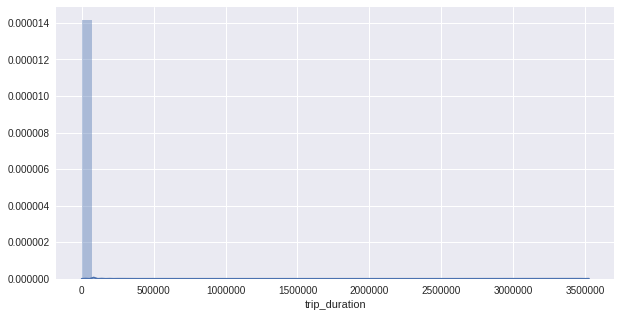

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(train['trip_duration'])

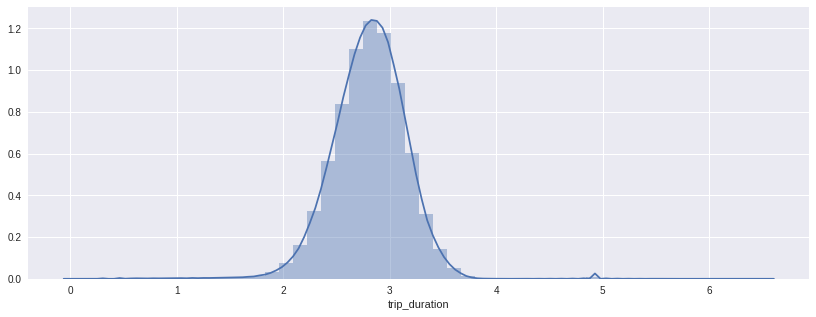

In [12]:
#apply log on traget variable
#train['trip_duration'] = np.log10(train)
plt.figure(figsize=(14,5))
sns.distplot(np.log10(train['trip_duration']))

In [14]:
#Check for latitude logitude bound
print('Latitude bound: {} to {}'.format(max(train['pickup_latitude'].min(),train['dropoff_latitude'].min()),
                                          max( train['pickup_latitude'].max(), train['dropoff_latitude'].max())))

print('Longitude bound: {} to {}'.format(max(train['pickup_longitude'].min(), train['dropoff_longitude'].min()),
                                        max(train['pickup_longitude'].max(),train['dropoff_longitude'].max())))

#Check for passenger count
print('Passenger:{} to {}'.format(train['passenger_count'].min(),train['passenger_count'].max()))

#Check for trip duration
print('Trip duration in seconds: {} to{}'.format(train['trip_duration'].min(), train['trip_duration'].max()))

#Check for datetime
print('Date and time: {} to {}'.format(train['pickup_datetime'].min(),train['dropoff_datetime'].max()))

Latitude bound: 34.35969543457031 to 51.88108444213867
Longitude bound: -121.93330383300781 to -61.33552932739258
Passenger:0 to 9
Trip duration in seconds: 1 to3526282
Date and time: 2016-01-01 00:00:17 to 2016-07-01 23:02:03


In [13]:
#Determine distance 
#https://rosettacode.org/wiki/Haversine_formula
def haversine(df,columns):
    lat1, lon1, lat2, lon2 = columns
      
    R = 6372.8 # Earth radius in kilometers
    dLat = np.radians(df[lat2] - df[lat1])
    dLon = np.radians(df[lon2] - df[lon1])
    lat1 = np.radians(df[lat1])
    lat2 = np.radians(df[lat2])
    
    
    a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
 
    return R * c

#Ecludian distance 
def ecludi(df,columns):
    lat1, lon1, lat2, lon2 = columns
    d = np.sqrt((df[lat2]-df[lat1])**2 + (df[lon2]-df[lon1])**2)
    return d

In [14]:
cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']

train['haversine_distances'] = haversine(train,cols)
test['haversine_distances'] = haversine(test,cols)

train['eclud_distances'] = ecludi(train,cols)
test['eclud_distances'] = ecludi(test,cols)
#distances = train[cols].apply(lambda x: haversine(x),axis = 1)
#train['haversine_distances'] = distances.copy()
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,pu_dayofYr,pu_month,pu_hour,pu_wday,pu_minute,is_weekend,is_satsun,haversine_distances,eclud_distances
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,74,3,17,0,24,0,0,1.498944,0.017680
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,164,6,0,6,43,1,1,1.806017,0.020456
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,19,1,11,1,35,0,0,6.386901,0.059934
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,97,4,19,2,32,0,0,1.485918,0.013438
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,86,3,13,5,30,1,1,1.188924,0.010690


In [88]:
train['haversine_distances'].describe()

count    1.458643e+06
mean     3.441838e+00
std      4.297752e+00
min      0.000000e+00
25%      1.232185e+00
50%      2.094312e+00
75%      3.876433e+00
max      1.241259e+03
Name: haversine_distances, dtype: float64

In [15]:
#Remove outlier
lowq , highq =1,99

#Remove outlier data haversine_distances and Trip duration
lowdp, highdp = np.percentile(train['haversine_distances'],[lowq , highq])
print('Quartile of Haversine Distance: {} to {}'.format(lowdp, highdp))

train_temp = train[train['haversine_distances'] < highdp]
train_temp = train_temp[train_temp['haversine_distances'] > lowdp]

lowdp, highdp = np.percentile(train['trip_duration'],[lowq , highq])
print('Quartile of Trip duration: {} to {}'.format(lowdp, highdp))

train_temp = train_temp[train_temp['trip_duration'] < highdp]
train_temp = train_temp[train_temp['trip_duration'] > lowdp]

print('Number of outlier data removed: {}'.format( train.shape[0]-train_temp.shape[0]))
train = train_temp
train.shape

Quartile of Haversine Distance: 0.1391580216464354 to 20.79339334895463
Quartile of Trip duration: 87.0 to 3440.0
Number of outlier data removed: 47350


(1411293, 23)

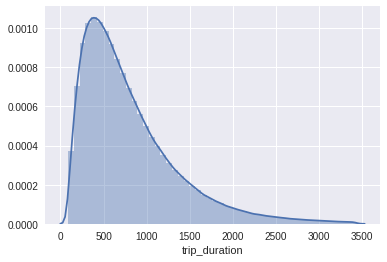

In [16]:
sns.distplot(train['trip_duration'])

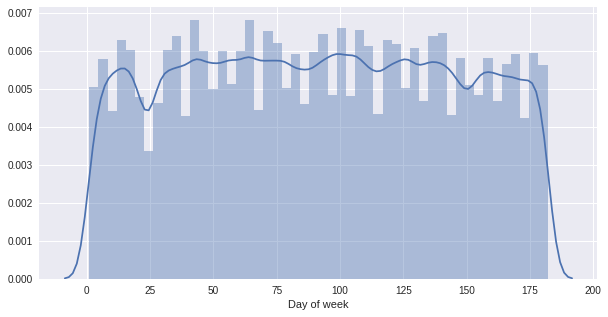

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(train['pu_dayofYr'])
plt.xlabel('Day of week')

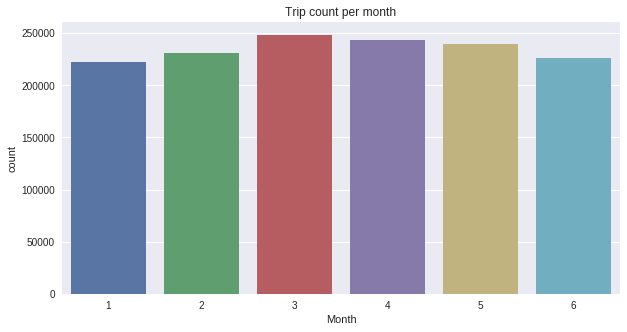

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='pu_month',data=train)
plt.xlabel('Month')
plt.title('Trip count per month')

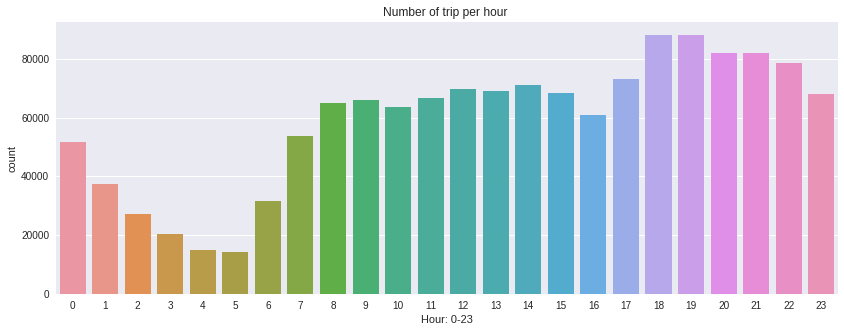

In [20]:
plt.figure(figsize=(14,5))
sns.countplot(x='pu_hour',data=train)
plt.xlabel('Hour: 0-23')
plt.title('Number of trip per hour ')

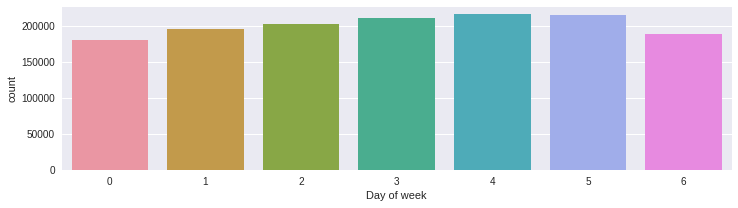

In [21]:
plt.figure(figsize=(12,3))
sns.countplot(x='pu_wday',data=train)
plt.xlabel('Day of week')

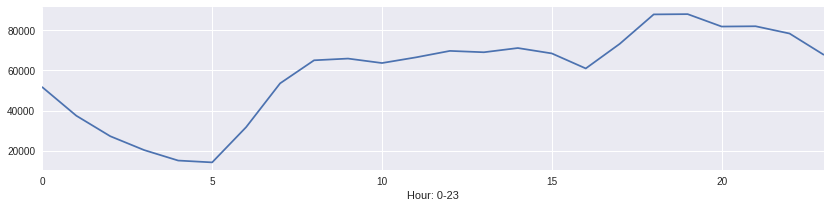

In [22]:
plt.figure(figsize=(14,3))
train.groupby('pu_hour').count()['id'].plot()
plt.xlabel('Hour: 0-23')

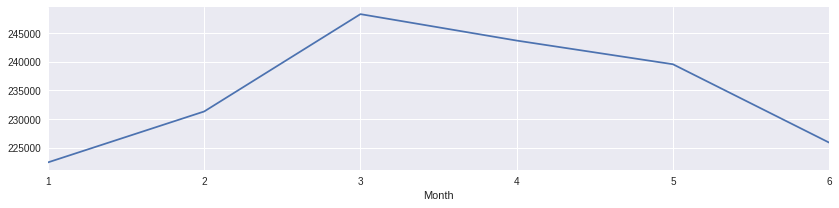

In [23]:
plt.figure(figsize=(14,3))
train.groupby('pu_month').count()['id'].plot()
plt.xlabel('Month')

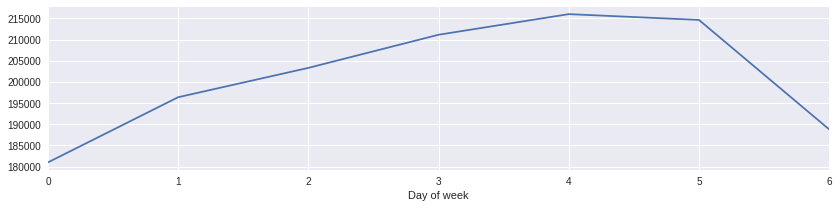

In [24]:
plt.figure(figsize=(14,3))
train.groupby('pu_wday').count()['id'].plot()
plt.xlabel('Day of week')

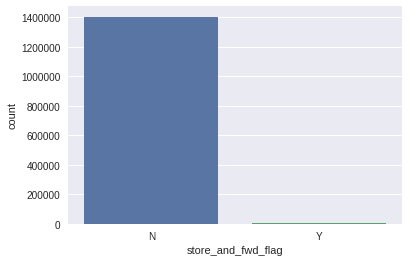

In [26]:
sns.countplot(train['store_and_fwd_flag'])

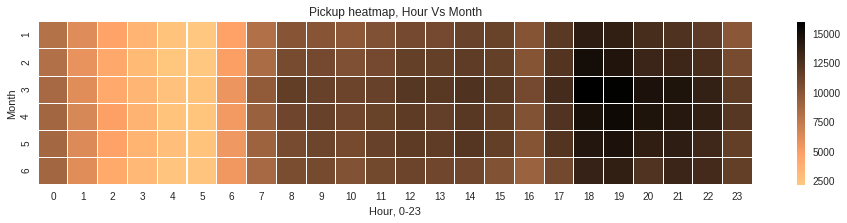

In [25]:
#Pickup heatmap month vs hour
monthVShour= train.groupby(['pu_month','pu_hour']).count()['passenger_count'].unstack()

plt.figure(figsize=(16,3))
sns.heatmap(monthVShour,cmap='copper_r',linewidths=.01)
plt.xlabel('Hour, 0-23')
plt.ylabel('Month')
plt.title('Pickup heatmap, Hour Vs Month')

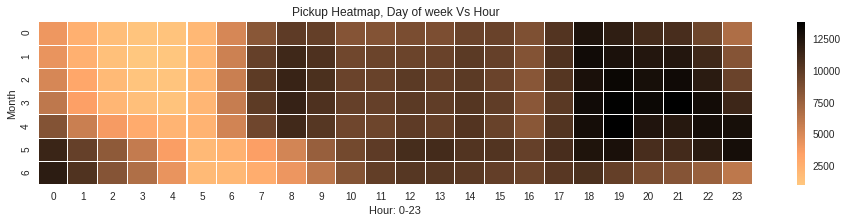

In [26]:
# Pickup Heatmap, Day of week Vs Hour
wdayVshour = train.groupby(['pu_wday','pu_hour']).count()['trip_duration'].unstack()

plt.figure(figsize=(16,3))
sns.heatmap(wdayVshour,cmap='copper_r',linewidths=0.01)
plt.xlabel('Hour: 0-23')
plt.ylabel('Month')
plt.title('Pickup Heatmap, Day of week Vs Hour')

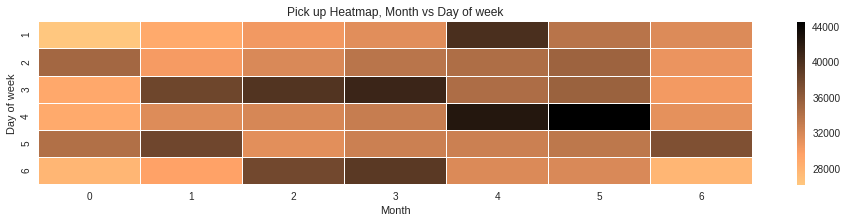

In [27]:
#Pick up Heatmap, Month vs Day of week
monthVswday = train.groupby(['pu_month','pu_wday']).count()['id'].unstack()

plt.figure(figsize=(16,3))
sns.heatmap(monthVswday,linewidths=.005,cmap='copper_r')

plt.title('Pick up Heatmap, Month vs Day of week')
plt.xlabel('Month')
plt.ylabel('Day of week')

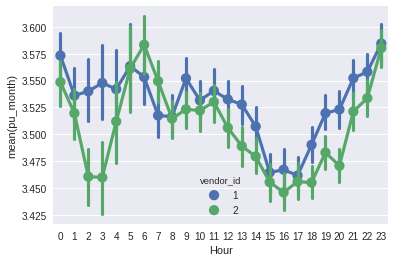

In [30]:
sns.pointplot(x='pu_hour',y='pu_month',data=train,hue='vendor_id')
plt.xlabel('Hour')

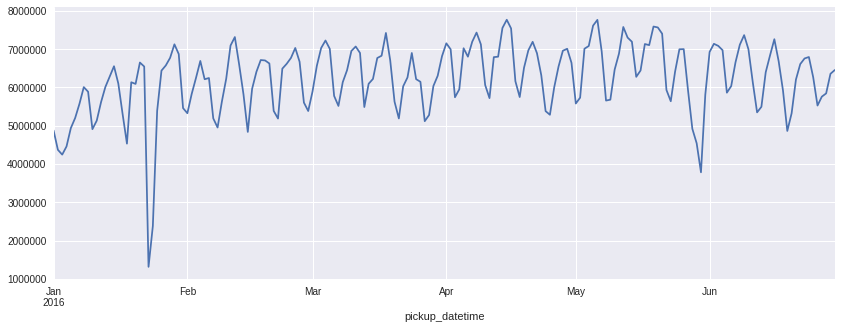

In [28]:
# Time series forcast
plt.figure(figsize=(14,5))
ts = pd.Series(np.array(train['trip_duration']),index=train['pickup_datetime'])
ts.resample('D').sum().plot()


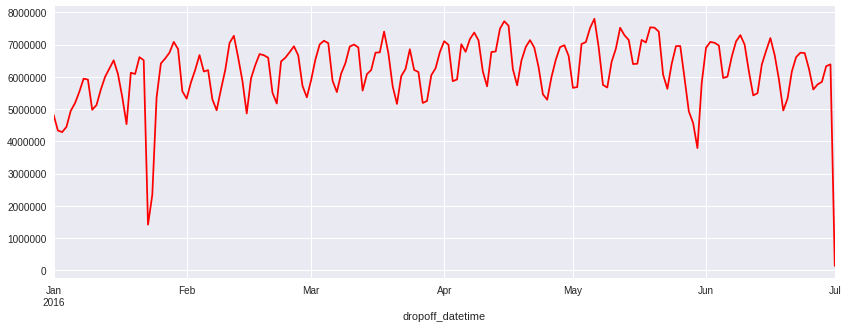

In [30]:
plt.figure(figsize=(14,5))
ts2 = pd.Series(np.array(train['trip_duration']),index=train['dropoff_datetime'])
ts2.resample('D').sum().plot(color='red')

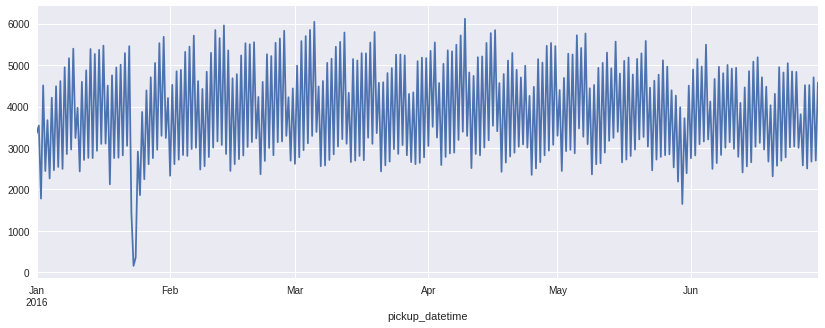

In [31]:
plt.figure(figsize=(14,5))
ts.resample('12H').count().plot()

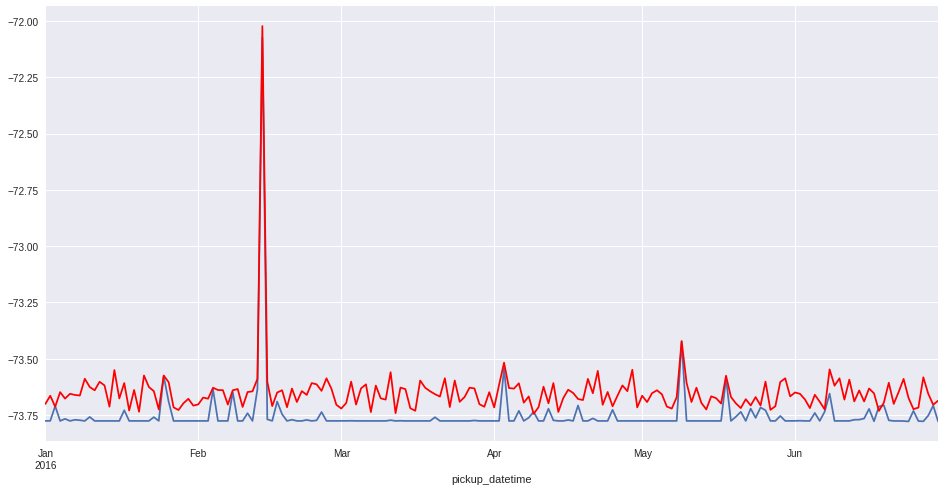

In [32]:
plt.figure(figsize=(16,8))
train.resample('D',on='pickup_datetime').max()['pickup_longitude'].plot()
train.resample('D',on='pickup_datetime').max()['dropoff_longitude'].plot(color='red')

In [33]:
def assign_cluster(df, k):
    """function to assign clusters """
    df_pick = df[['pickup_longitude','pickup_latitude']]
    df_drop = df[['dropoff_longitude','dropoff_latitude']]
    #df = df.dropna()
    init = np.array([[ -73.98737616,   40.72981533],
       [-121.93328857,   37.38933945],
       [ -73.78423222,   40.64711269],
       [ -73.9546417 ,   40.77377538],
       [ -66.84140269,   36.64537175],
       [ -73.87040541,   40.77016484],
       [ -73.97316185,   40.75814346],
       [ -73.98861094,   40.7527791 ],
       [ -72.80966949,   51.88108444],
       [ -76.99779701,   38.47370625],
       [ -73.96975298,   40.69089596],
       [ -74.00816622,   40.71414939],
       [ -66.97216034,   44.37194443],
       [ -61.33552933,   37.85105133],
       [ -73.98001393,   40.7783577 ],
       [ -72.00626526,   43.20296402],
       [ -73.07618713,   35.03469086],
       [ -73.95759366,   40.80316361],
       [ -79.20167796,   41.04752096],
       [ -74.00106031,   40.73867723]])
    k_means_pick = KMeans(n_clusters=k, init=init, n_init=1)
    k_means_pick.fit(df_pick)
    clust_pick = k_means_pick.labels_
    df['label_pick'] = clust_pick.tolist()
    df['label_drop'] = k_means_pick.predict(df_drop)
    return df, k_means_pick


In [34]:
train_cl, k_means = assign_cluster(train, 20)  # make it 100 when extracting features 
centroid_pickups = pd.DataFrame(k_means.cluster_centers_, columns = ['centroid_pick_long', 'centroid_pick_lat'])
centroid_dropoff = pd.DataFrame(k_means.cluster_centers_, columns = ['centroid_drop_long', 'centroid_drop_lat'])
centroid_pickups['label_pick'] = centroid_pickups.index
centroid_dropoff['label_drop'] = centroid_dropoff.index
#centroid_pickups.head()
train_cl = pd.merge(train_cl, centroid_pickups, how='left', on=['label_pick'])
train_cl = pd.merge(train_cl, centroid_dropoff, how='left', on=['label_drop'])

In [36]:
test_cl, kmeans = assign_cluster(test,20)
centroid_pickups = pd.DataFrame(k_means.cluster_centers_,columns=['centroid_pick_long','centroid_pick_lat'])
centroid_dropoff = pd.DataFrame(k_means.cluster_centers_,columns=['centroid_drop_long','centroid_drop_lat'])
centroid_pickups['label_pick'] = centroid_pickups.index
centroid_dropoff['label_drop'] = centroid_dropoff.index
test_cl = pd.merge(test_cl, centroid_pickups, how='left', on=['label_pick'])
test_cl = pd.merge(test_cl, centroid_dropoff, how='left', on=['label_drop'])

In [38]:
train = train_cl
test  = test_cl
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,is_weekend,is_satsun,haversine_distances,eclud_distances,label_pick,label_drop,centroid_pick_long,centroid_pick_lat,centroid_drop_long,centroid_drop_lat
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,1.498944,0.017680,14,6,-73.986540,40.763129,-73.971457,40.758352
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1,1,1.806017,0.020456,7,19,-73.986696,40.746153,-74.001884,40.738943
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,0,6.386901,0.059934,14,11,-73.986540,40.763129,-74.008474,40.714147
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,0,1.485918,0.013438,11,11,-74.008474,40.714147,-74.008474,40.714147
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1,1,1.188924,0.010690,17,17,-73.975333,40.786054,-73.975333,40.786054


In [35]:
#Map
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, plot,iplot, init_notebook_mode
init_notebook_mode(connected=True)

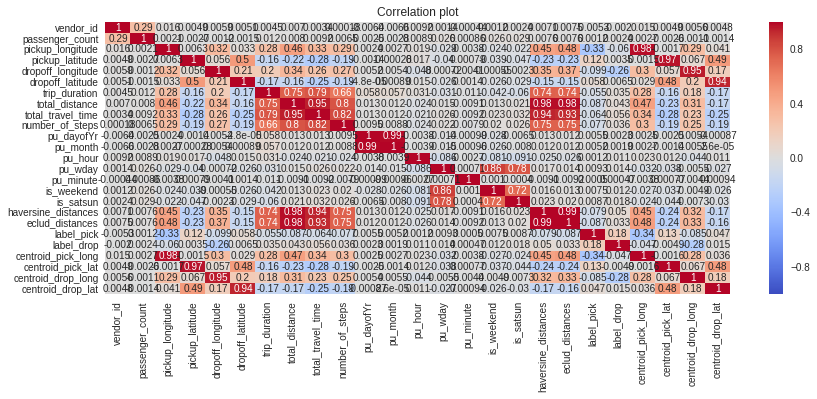

In [39]:
tc = train.corr()
plt.figure(figsize=(14,5))
sns.heatmap(tc,annot=True,cmap='coolwarm')
plt.title("Correlation plot")

In [40]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
def encode(data):
    le = LabelEncoder()
    data['store_and_fwd_flag'] = le.fit_transform(data['store_and_fwd_flag'])
encode(train)
encode(test)

# Feature selection

In [41]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'total_distance', 'total_travel_time',
       'number_of_steps', 'pu_dayofYr', 'pu_month', 'pu_hour', 'pu_wday',
       'pu_minute', 'is_weekend', 'is_satsun', 'haversine_distances',
       'eclud_distances', 'label_pick', 'label_drop', 'centroid_pick_long',
       'centroid_pick_lat', 'centroid_drop_long', 'centroid_drop_lat'],
      dtype='object')

In [42]:
Xcol = [ 'passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 
        'dropoff_latitude', 'total_distance','total_travel_time','number_of_steps','store_and_fwd_flag','pu_dayofYr', 
        'pu_month','pu_hour', 'pu_wday','pu_minute','is_weekend','is_satsun','haversine_distances','eclud_distances',
       'label_pick', 'label_drop', 'centroid_pick_long','centroid_pick_lat', 'centroid_drop_long', 'centroid_drop_lat']
X_train = train[Xcol]
y_train = train['trip_duration']

X_test = test[Xcol]

from sklearn.cross_validation import train_test_split

Tx_train,Tx_test,Ty_train,Ty_test = train_test_split(X_train,y_train,test_size=0.3,random_state=0)
Ty_train.head()

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


867307      470
779497      871
1007787     799
418785      653
285660     2269
Name: trip_duration, dtype: int32


Model building

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Tx_train,(Ty_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
y_pred = model.predict(Tx_test)
y_pred = (y_pred)
print(y_pred[0:5])

print('R**2:',model.score(Tx_test,Ty_test))

[  400.56567335   913.91661819   486.29717768   723.96525741  1587.91459776]
R**2: 0.638964760887


In [43]:
# Transform log base 10 value to linear
#y_pred = 10 **y_pred
#y_pred[0:5]

R**2 0.638964760887
Adjusted R**2 0.638958621128


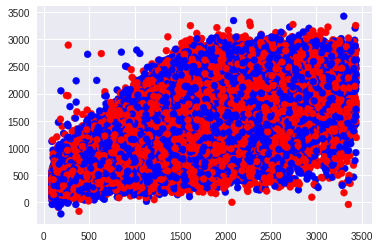

In [46]:
#Model Evaluvation
SS_Residual = sum((Ty_test-y_pred)**2)
SS_Total = sum((Ty_test-np.mean(Ty_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print ('R**2',r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Adjusted R**2',adjusted_r_squared)

plt.scatter(Ty_test,y_pred,c=('r','b'))


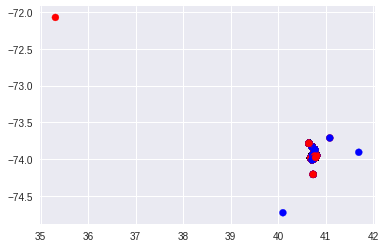

In [53]:
#Building optimal model using backward elimination
import statsmodels.formula.api as sm

X = np.append(arr=np.ones((X_train.shape[0],1)).astype(int),values= X_train.values,axis=1)
X_opt = X
model_ols = sm.OLS(endog=(y_train.values),exog=X_opt).fit()
model_ols.summary()
#model_ols.rsquared
# NO need of backward elimination

In [56]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
#from sklearn.metrics import confusion_matrix
rf  = RandomForestRegressor(n_estimators=5,verbose=True)
gbm = GradientBoostingRegressor()
rf.fit(Tx_train,Ty_train)
print(rf.feature_importances_)



KeyboardInterrupt: 

In [ ]:
import 

In [48]:
def rmsle(y_train,y_pred):
    return np.sqrt(np.mean((np.log(Ty_test+1)-np.log(y_pred+1))**2))
print('RMSLE:',rmsle(Ty_test,y_pred))

RMSLE: 0.42924865093


/home/sudhir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


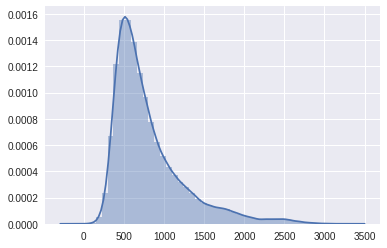

In [49]:
sns.distplot(y_pred)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                 1.044e+05
Date:                Mon, 28 Aug 2017   Prob (F-statistic):               0.00
Time:                        21:50:28   Log-Likelihood:            -1.0201e+07
No. Observations:             1411293   AIC:                         2.040e+07
Df Residuals:                 1411268   BIC:                         2.040e+07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.043e+05   1365.759    -76.394      0.000   -1.07e+05   -1.02e+05
x1             2.7821      0.214     13.015      0.000       2.363       3.201
x2          -671.7680     45.653    -14.715      0.000    -761.246    -582.290
x3          1252.9121     44.157     28.374      0.000    1166.367    1339.458
x4          -331.1393     30.625    -10.813      0.000    -391.163    -271.115
x5          -348.1477     27.693    -12.572      0.000    -402.425    -293.871
x6            -0.0155      0.000    -35.725      0.000      -0.016      -0.015
x7             1.5140      0.004    373.259      0.000       1.506       1.522
x8             8.0821      0.129     62.683      0.000       7.829       8.335
x9            20.8746      3.872      5.391      0.000      13.285      28.465
x10            0.3891      0.032     12.064      0.000       0.326       0.452
x11            3.4894      0.989      3.527      0.000       1.550       5.428
x12            3.4538      0.044     78.253      0.000       3.367       3.540
x13           21.1760      0.321     65.978      0.000      20.547      21.805
x14           -0.1113      0.016     -6.867      0.000      -0.143      -0.080
x15          -45.1669      1.127    -40.093      0.000     -47.375     -42.959
x16         -133.0807      1.007   -132.120      0.000    -135.055    -131.106
x17            8.5030      0.872      9.755      0.000       6.795      10.211
x18         1402.7624     70.215     19.978      0.000    1265.143    1540.381
x19           -0.6507      0.052    -12.519      0.000      -0.753      -0.549
x20           -1.6828      0.052    -32.547      0.000      -1.784      -1.581
x21          785.8273     46.535     16.887      0.000     694.620     877.034
x22          163.7217     45.153      3.626      0.000      75.224     252.219
x23         -285.2616     31.267     -9.123      0.000    -346.543    -223.980
x24          582.0120     30.676     18.973      0.000     521.887     642.137
==============================================================================
Omnibus:                   420306.407   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1999211.632
Skew:                           1.377   Prob(JB):                         0.00
Kurtosis:                       8.139   Cond. No.                     3.04e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Submit solution
#pred = np.exp(model.predict(X_test))-1
pred = np.sqrt(model.predict(X_test)**2)
submit = pd.DataFrame({'id':test['id'],'trip_duration':pred})
submit.to_csv('nyc_predict.csv',index=False)
submit.head()

,id,trip_duration
0,id3004672,950.121866
1,id3505355,566.949554
2,id1217141,610.006883
3,id2150126,1192.099386
4,id1598245,504.346764
